In [1]:
import numpy as np
from scipy.optimize import minimize
import scipy.signal as si
import sympy as sp
import control as ct
from typing import List
from sympy.plotting import plot
import matplotlib.pyplot as plt
from IPython.display import display, Latex, Math, Image
%matplotlib inline

def eq_disp(varstring, expr, unit=""):
    display(Latex(f"${varstring}={sp.latex(expr)} \: {unit}$"))
    
def reduce_feedback(G_fwd, G_bwd):
    """Assumes feedback is deducted from signal, if not
    change sign of feedback"""
    return sp.simplify(G_fwd/(1+G_fwd*G_bwd))

# Problem 3

## The transfer function

In [2]:
s = ct.tf('s')
G = 1/(s**2 + 2*s + 5)
G

TransferFunction(array([1]), array([1, 2, 5]))

## The step response and bode plot

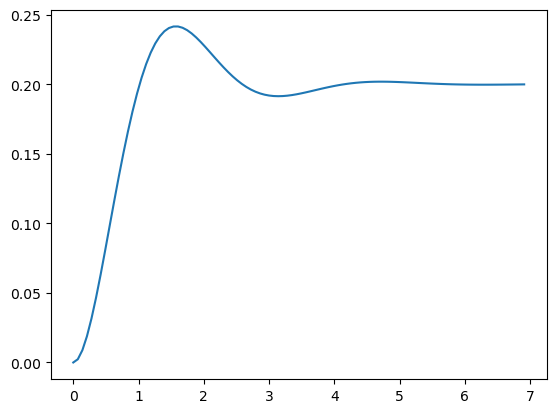

In [3]:
plt.plot(*ct.step_response(G))

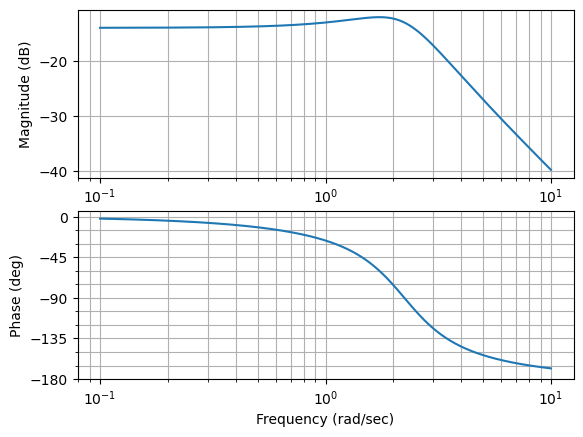

In [4]:
mag, phase, omega = ct.bode(G, dB=True)

## Finding the parameters for the sensor

The natural frequency, damping ratio, time constant, percentage overshoot, bandwidth are respectively:

In [5]:
wn, zeta, poles = ct.damp(G, doprint=False)
wn = wn[0]
zeta = zeta[0]

attributes = ct.step_info(G)
locals().update(attributes)

tau = 1/(zeta*wn)

PO = (Peak - SteadyStateValue)/SteadyStateValue*100

for i, magnitude in enumerate(mag):
    if ct.mag2db(magnitude) <= ct.mag2db(mag[0])-3:
        wB = omega[i]
        break

eq_disp('\\omega_n', round(wn,2), 'rad/s')
eq_disp('\\zeta', round(zeta,2))
eq_disp('\\tau', tau, 's')
eq_disp('P.O.', round(PO,2), '\\%')
eq_disp('\\omega_B', round(wB,2), 'rad/s')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>